In [34]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [36]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

### 경남 노인 인구 분포- 거제

In [97]:
gdf = gpd.read_file(
    "../data/경남 노인 인구 분포/거제시/nlsp_021001010.shp", 
    encoding="utf-8", 
    )
gdf['val'] = gdf['val'].fillna(0)
gdf = gdf.to_crs(epsg=5179)


### 경남 지도- 거제

In [108]:
emd_geo = gpd.read_file(
    "../data/emd_20230729/emd.shp", 
    encoding="cp949", 
    )
emd_geo = emd_geo[emd_geo["EMD_CD"].apply(lambda x: x[:5] == "48310")]

emd_geo = emd_geo.set_crs(crs="EPSG:5179")

### 거제 노인 인구 분포 지도

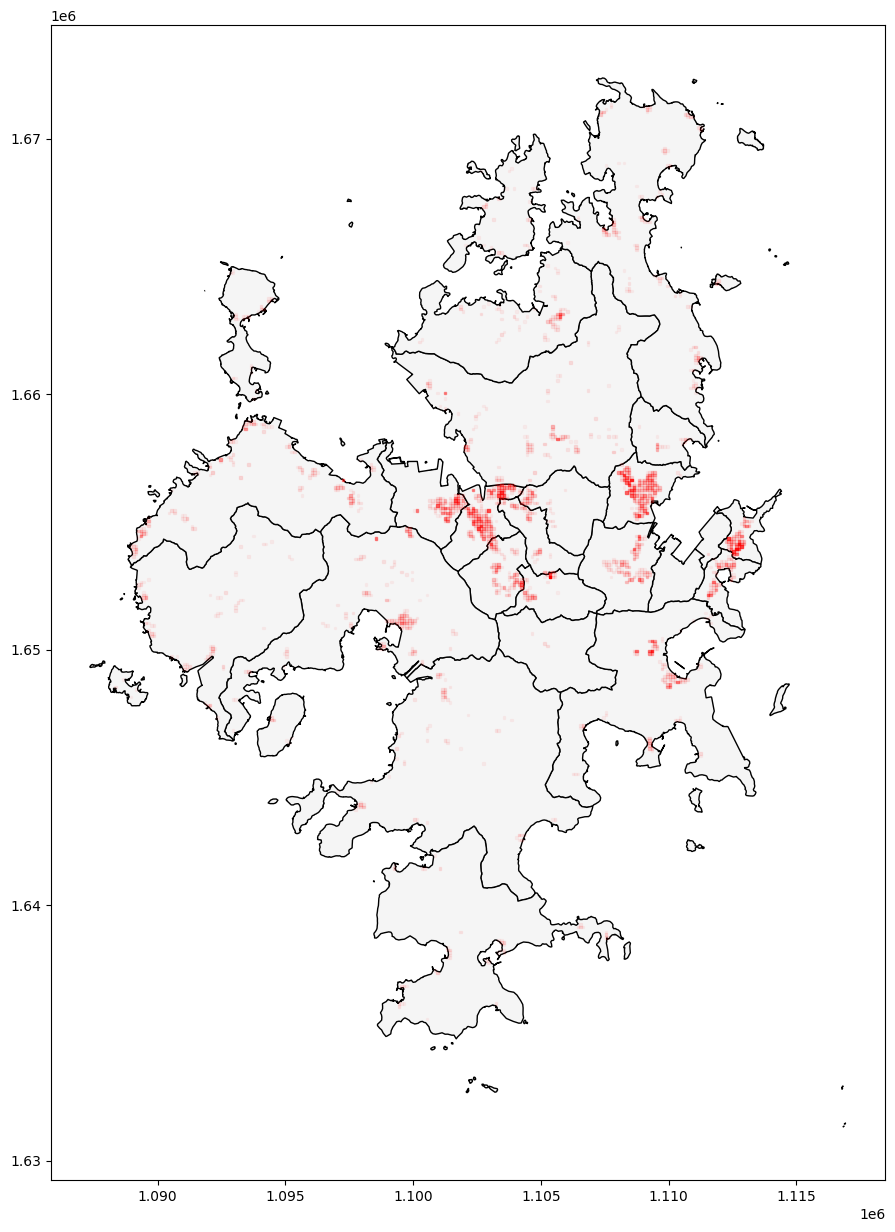

In [113]:
norm = Normalize(vmin=gdf['val'].min(), vmax=gdf['val'].max())

ax = emd_geo.plot(
    figsize = (20, 15), 
    color = "whitesmoke", 
    edgecolor = "black", 
    linewidth = 1,
    column = "EMD_KOR_NM",
    legend = True, 
    categorical = True
)
gdf.plot(
    ax=ax,
    figsize = (20, 15), 
    color = "red",
    alpha = norm(gdf['val']),
    edgecolor = "red", 
    linewidth = 1,
    column = "EMD_KOR_NM",
    legend = True, 
    categorical = True
)

plt.show()
